# **$Association Rules$**

You are asked to create a Movie Recommendation System using Association Rules for a given dataset. The given dataset is Movie lens dataset. The dataset lists movies, user ratings, tags, etc. You are asked to build a recommendation system that can provide recommendations for movies that customers may want to see based on movies that have been seen before.<br>
We will be using Movie Lens dataset (ml-25m) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 27753444 ratings and 1,129 tag applications across 62,000 movies. These data were created by 162,000 users released December 2019.

<span style="color:red">**Your Task is as Follows:**</span><br>
- Preprocess the dataset to create a transactional list were every row represent a user and his selected movies
- Transform the preprocessed movie merge list into binary input
- Frequent Itemset Mining: Use FP-Growth and Apriori algorithms to find items that frequently co-occur in the dataset
    - Code Apriori Algorithm
    - Make Explanation about the result
    - Code FP-Growth Algorithm
    - Make Explanation about the result
- Use the discovered frequent itemset to find association rules between items that appear together in the dataset.
    - Code Association Rules
    - Make Explanation about the result
- Run All Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# $Dataset$

## Importing Dataset

In [2]:
#Download Data Using request, must be executed, and will add the dataset to your main directory.
import requests, zipfile, io
zipfile.ZipFile(io.BytesIO(requests.get('https://files.grouplens.org/datasets/movielens/ml-25m.zip').content)).extractall()

## Selecting Data

In [3]:
ls -a ml-25m

 Volume in drive D is Data
 Volume Serial Number is ACB2-FFBF

 Directory of d:\Grader Data Mining\Kunci Datmin


 Directory of d:\Grader Data Mining\Kunci Datmin\ml-25m

04/07/2023  10:00 PM    <DIR>          .
04/07/2023  10:00 PM    <DIR>          ..
04/07/2023  10:00 PM       435,164,157 genome-scores.csv
04/07/2023  10:00 PM            18,103 genome-tags.csv
04/07/2023  10:00 PM         1,368,578 links.csv
04/07/2023  10:00 PM         3,038,099 movies.csv
04/07/2023  10:00 PM       678,260,987 ratings.csv
04/07/2023  10:00 PM            10,460 README.txt
04/07/2023  10:00 PM        38,810,332 tags.csv
               7 File(s)  1,156,670,716 bytes
               2 Dir(s)  508,252,721,152 bytes free


File Not Found


In [4]:
data_movies = pd.read_csv('ml-25m/movies.csv')
data_tages = pd.read_csv('ml-25m/tags.csv')
data_ratings = pd.read_csv('ml-25m/ratings.csv')

## Exploratory

### **Movies Data** <br>
This is the only dataset that contains the titile of the movies and each movie unique key without Duplicate Value.

In [5]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
data_movies.movieId.value_counts(), print('Number of duplicated unique ids are: ',data_movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(1         1
 162130    1
 162070    1
 162072    1
 162074    1
          ..
 107614    1
 107623    1
 107625    1
 107630    1
 209171    1
 Name: movieId, Length: 62423, dtype: int64,
 None)

### **Movies tages Data** <br>
This dataset contain the added tags to the movie plus the userid which is valuable to be considered as an index to each transaction, on the other hand the dataset has less movie ids than the rating dataset which made us select it instead.

In [7]:
data_tages.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [8]:
data_tages.movieId.value_counts()

260       6180
79132     4767
296       4767
109487    3616
2959      3612
          ... 
128798       1
183647       1
183605       1
128884       1
128534       1
Name: movieId, Length: 45251, dtype: int64

### **Movies Ratings Data** <br>
This dataset contain the added tags to the movie plus the userid which is valuable to be considered as an index to each transaction, on the other hand the dataset has less movie ids than the rating dataset which made us select it instead.

In [9]:
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [10]:
data_ratings.movieId.value_counts()

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
193109        1
112393        1
142793        1
111842        1
200728        1
Name: movieId, Length: 59047, dtype: int64

# Preprocessing

## Transform Data

### **Merging Dataset** <br>
in this case inner join is selected since we need the data only when both movieId labels are existed on both datasets.

In [11]:
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel,1223304729
...,...,...,...,...,...,...
1093355,209063,The Prep School Negro (2012),(no genres listed),96399,Philadelphia,1574021180
1093356,209063,The Prep School Negro (2012),(no genres listed),96399,private school,1574021158
1093357,209063,The Prep School Negro (2012),(no genres listed),96399,quaker,1574021197
1093358,209063,The Prep School Negro (2012),(no genres listed),96399,racism,1574021194


### **Drop Variable** <br>
Dropping Unneeded Columns

In [12]:
merge.drop(columns=['tag','timestamp','genres'],inplace=True)

In [13]:
merge

,movieId,title,userId
0,1,Toy Story (1995),791
1,1,Toy Story (1995),1048
2,1,Toy Story (1995),1361
3,1,Toy Story (1995),3164
4,1,Toy Story (1995),3164
...,...,...,...
1093355,209063,The Prep School Negro (2012),96399
1093356,209063,The Prep School Negro (2012),96399
1093357,209063,The Prep School Negro (2012),96399
1093358,209063,The Prep School Negro (2012),96399


In [14]:
len(merge.userId.unique()) 

14592

<span style="color:blue">**Code Task 1**</span><br>

Here you can preprocess the dataset to create a transactional list were every row represent a user and his selected movies using groupby

In [15]:
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,3,"[Star Wars: Episode IV - A New Hope (1977), St..."
1,4,"[Big Lebowski, The (1998), Big Lebowski, The (..."
2,19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
3,20,[Star Wars: Episode VI - Return of the Jedi (1...
4,43,[Cliffhanger (1993)]


Let's validate the created list per userId

In [16]:
print(len(merge.userId.unique()))
print(len(merge_list))

14592
14592


In [17]:
merge_list

,userId,title
0,3,"[Star Wars: Episode IV - A New Hope (1977), St..."
1,4,"[Big Lebowski, The (1998), Big Lebowski, The (..."
2,19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
3,20,[Star Wars: Episode VI - Return of the Jedi (1...
4,43,[Cliffhanger (1993)]
...,...,...
14587,162495,[Forgetting Sarah Marshall (2008)]
14588,162501,"[Gone Girl (2014), Gone Girl (2014), Gone Girl..."
14589,162512,"[Postman, The (1997), Patriot Games (1992)]"
14590,162521,"[Shaun of the Dead (2004), Hot Fuzz (2007), Dr..."


### **Transforming Data** <br>
Here data is transfered as a binary input to be accepted by the algorithm.<br>
Your Task is to transform the data into binary input with methods you had explore and name it df

<span style="color:blue">**Code Task 2**</span><br>

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
col_encode = merge_list['title']
mlb = MultiLabelBinarizer()

df = pd.DataFrame(mlb.fit_transform(col_encode),columns=mlb.classes_, index=merge_list.index)
df

,"""Great Performances"" Cats (1998)",#1 Cheerleader Camp (2010),#Captured (2017),#FollowMe (2019),#Horror (2015),#Stuck (2014),#realityhigh (2017),$ (Dollars) (1971),"$1,000 on the Black (1966)","$100,000 for Ringo (1965)",$9.99 (2008),$ellebrity (Sellebrity) (2012),'49-'17 (1917),'63 Boycott (2016),'68 (1988),'71 (2014),'Gator Bait (1974),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Master Harold' ... And the Boys (2010),'Neath Brooklyn Bridge (1942),'Neath the Arizona Skies (1934),'Pimpernel' Smith (1941),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night (2001),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Dis)Honesty: The Truth About Lies (2015),(T)ERROR (2015),(The New) War of the Buttons (2011),(Untitled) (2009),*batteries not included (1987),+1 (2013),...All the Marbles (1981),...And God Spoke (1993),...And Justice for All (1979),...First Do No Harm (1997),...ing (2003),...tick... tick... tick... (1970),.45 (2006),.hack Liminality: In the Case of Mai Minase,.hack//Beyond the World (2012),008: Operation Exterminate (1966),009 Re: Cyborg (2012),009-1: The End of the Beginning (2013),1 (2013),1 (2014),1 Buck (2017),1 Chance 2 Dance (2014),1 Night (2017),1. Mai (2008),10 (1979),10 Billion: What's On Your Plate (2015),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Days in a Madhouse (2015),10 Items or Less (2006),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Rules for Sleeping Around (2013),10 Things I Hate About You (1999),10 Years (2011),10 minutes (10 minuta) (2002),10 to Midnight (1983),10%: What Makes a Hero? (2013),10+10 (2011),"10,000 BC (2008)","10,000 Black Men Named George (2002)","10,000 Dollars for a Massacre (1967)",10.0 Earthquake (2014),100 Bloody Acres (2012),100 Days (1991),100 Days Before the Command (1991),100 Days Of Love (2015),100 Days With Mr. Arrogant (2004),100 Degrees Below Zero (2013),100 Dinge (2018),100 Feet (2008),100 Girls (2000),100 Men and a Girl (One Hundred Men and a Girl) (1937),100 Million BC (2008),100 Poems for Stella (2017),100 Rifles (1969),100 Streets (2016),100 Women (2002),100 Years at the Movies (1994),100 Yen Love (2014),100 Yen: The Japanese Arcade Experience (2012),100 metros (2016),100% Love (2011),"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)",1000 Journals (2007),1001 Nights (1990),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Rent Boys (2000),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),102 Minutes That Changed America (2008),10th & Wolf (2006),"10th Victim, The (La decima vittima) (1965)",10x10 (2018),11 Blocks (2015),11 Days 11 Nights Part 3 (1989),11 Days 11 Nights: Part 1 - Fantasy Becomes Reality (1987),"11 Days, 11 Nights 2 (1990)",11 Harrowhouse (1974),11 Minutes (2015),11 September Vragen (2016),11 x 14 (1977),"11'09""01 - September 11 (2002)",11-11-11 (11-11-11: The Prophecy) (2011),11.22.63 (2016),11/11/11 (2011),11:00 AM (2013),11:14 (2003),11:59 (2005),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Dates of Christmas (2011),12 Days of Christmas Eve (2004),"12 Dogs of Christmas, The (2005)",12 Feet Deep (2016),12 Gifts of Christmas (2015),12 Men of Christmas (2009),12 O'Clock Boys (2013),12 Rounds (2009),12 Rounds 3: Lockdown (2015),12 Storeys (Shier lou) (1997),12 Strong (2018),12 Wishes of Christmas (2011),12 Years a Slave (2013),12 registi per 12 città (1989),12 to the Moon (1960),120 (2008),120 Beats Per Minute (2017),125 Years Memory (2015),127 Hours (2010),12:01 (1993),12:08 East of Bucharest (A fost sau n-a fost?) (2006),12th & Delaware (2010),13 (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Beloved (13 game sayawng) (2006),13 Cameras (2015),13 Eerie (2013),13 Figh

In [19]:
df.shape

(14592, 45208)

# $Process$

## Frequent Items <br>
This section implement the use of the itemsets generation according to the selected parameters. <br>

### **Apriori** <br>
your task is to code Apriori with 1% minimum support value, and give explanation from the result

<span style="color:blue">**Code Task 3**</span><br>

In [20]:
from mlxtend.frequent_patterns import apriori

apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True)

c:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

1    208
2     37
3      1
Name: itemsets, dtype: int64

In [22]:
apriori_frequent_itemsets['support'].describe()

count    246.000000
mean       0.016141
std        0.011124
min        0.010005
25%        0.011376
50%        0.013501
75%        0.016927
max        0.149191
Name: support, dtype: float64

<span style="color:red">**Give Your Explanation Here!**</span>
<br>

### **Fpgrowth** <br>
your task is to code Fpgrowth from frequent itemset with 1% minimum support value threshold, and give explanation from the result

<span style="color:blue">**Code Task 4**</span><br>

In [23]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

c:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.149191,(Star Wars: Episode IV - A New Hope (1977))
1,0.021656,(Ex Machina (2015))
2,0.017749,"(Big Lebowski, The (1998))"
3,0.010211,(Nightcrawler (2014))
4,0.014597,(Star Wars: Episode VI - Return of the Jedi (1...


In [24]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

1    208
2     37
Name: itemsets, dtype: int64

In [25]:
fpgrowth_frequent_itemsets['support'].describe()

count    245.000000
mean       0.016165
std        0.011141
min        0.010005
25%        0.011376
50%        0.013501
75%        0.016927
max        0.149191
Name: support, dtype: float64

<span style="color:red">**Give Your Explanation Here!**</span>
<br>

## Association Rule<br>
Lets create new feature that can be used for further analysis, Apply the association rules from the result of the previous algorithm

In [92]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets['length'].describe()

count    245.000000
mean       1.151020
std        0.358802
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: length, dtype: float64

<span style="color:blue">**Code Task 5**</span><br>

In [93]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(fpgrowth_frequent_itemsets, metric ='confidence', min_threshold=0.1)
rules.sort_values(by=['confidence'], ascending=False)

CPU times: total: 0 ns
Wall time: 0 ns


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,"(Lord of the Rings: The Two Towers, The (2002))",(Lord of the Rings: The Fellowship of the Ring...,0.018846,0.023438,0.012404,0.658182,28.082424,0.011962,2.856965
54,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.016447,0.149191,0.010280,0.625000,4.189251,0.007826,2.268823
45,"(Lord of the Rings: The Two Towers, The (2002))","(Lord of the Rings: The Return of the King, Th...",0.018846,0.021245,0.011719,0.621818,29.269584,0.011318,2.588055
56,"(Lord of the Rings: The Return of the King, Th...",(Lord of the Rings: The Fellowship of the Ring...,0.021245,0.023438,0.012061,0.567742,24.223656,0.011563,2.259212
57,(Reservoir Dogs (1992)),(Pulp Fiction (1994)),0.021793,0.064693,0.012336,0.566038,8.749600,0.010926,2.155273
...,...,...,...,...,...,...,...,...,...
66,(Pulp Fiction (1994)),(Seven (a.k.a. Se7en) (1995)),0.064693,0.027070,0.010896,0.168432,6.222184,0.009145,1.169995
22,(Pulp Fiction (1994)),(Donnie Darko (2001)),0.064693,0.030359,0.010759,0.166314,5.478211,0.008795,1.163076
69,(Pulp Fiction (1994)),(Twelve Monkeys (a.k.a. 12 Monkeys) (1995)),0.064693,0.023712,0.010622,0.164195,6.924660,0.009088,1.168081
9,(Pulp Fiction (1994)),(Eternal Sunshine of the Spotless Mind (2004)),0.064693,0.031867,0.010280,0.158898,4.986331,0.008218,1.151030


In [94]:
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(Lord of the Rings: The Return of the King, Th...","(Lord of the Rings: The Two Towers, The (2002))",0.021245,0.018846,0.011719,0.551613,29.269584,0.011318,2.188185
45,"(Lord of the Rings: The Two Towers, The (2002))","(Lord of the Rings: The Return of the King, Th...",0.018846,0.021245,0.011719,0.621818,29.269584,0.011318,2.588055
42,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Two Towers, The (2002))",0.023438,0.018846,0.012404,0.529240,28.082424,0.011962,2.084191
43,"(Lord of the Rings: The Two Towers, The (2002))",(Lord of the Rings: The Fellowship of the Ring...,0.018846,0.023438,0.012404,0.658182,28.082424,0.011962,2.856965
56,"(Lord of the Rings: The Return of the King, Th...",(Lord of the Rings: The Fellowship of the Ring...,0.021245,0.023438,0.012061,0.567742,24.223656,0.011563,2.259212
...,...,...,...,...,...,...,...,...,...
54,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.016447,0.149191,0.010280,0.625000,4.189251,0.007826,2.268823
3,(Inception (2010)),(Pulp Fiction (1994)),0.042626,0.064693,0.010280,0.241158,3.727724,0.007522,1.232544
2,(Pulp Fiction (1994)),(Inception (2010)),0.064693,0.042626,0.010280,0.158898,3.727724,0.007522,1.138238
12,(Forrest Gump (1994)),(Star Wars: Episode IV - A New Hope (1977)),0.046532,0.149191,0.013363,0.287187,1.924958,0.006421,1.193593


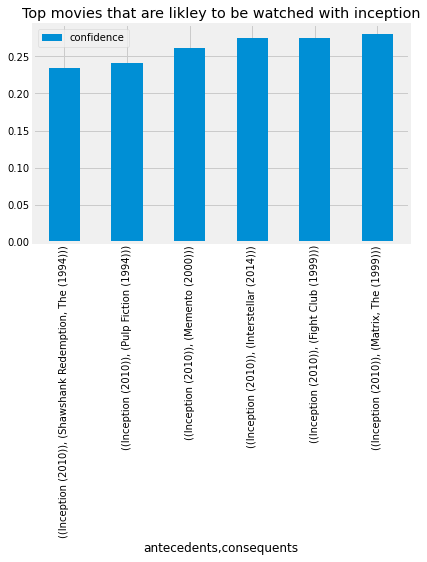

In [95]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');

<span style="color:red">**Give Your Explanation Here!**</span>
<br>

# Visualize Association Rules with (Networkx)<br>
to see network visualization between movies based on association rules

In [96]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))

In [97]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import networkx as nx
import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

# Create a Plotly figure
fig = go.Figure()

edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift')
                           ,source='antecedents',target='consequents',edge_attr=None)
pos = nx.spring_layout(edges, seed=42)  # use spring_layout instead
# Add edges as scatter trace
edge_x = []
edge_y = []
for edge in edges.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

fig.add_trace(edge_trace)

# Add nodes as scatter trace
node_x = []
node_y = []
node_text = []
for node in edges.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        line_width=2))

node_trace.text = node_text
fig.add_trace(node_trace)

# Set layout and display the figure
fig.update_layout(
    title='Top 100 movies in term of (lift)',
    title_font_size=25,
    font_size=18,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

iplot(fig)